In [1]:
import glob

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

from kraken.lib.train import KrakenTrainer
from kraken.lib import xml, dataset, segmentation
from kraken.lib.exceptions import KrakenInputException

ground_truth = glob.glob(
    'data/Rodich_1876_-_2/gt/*.xml'
)
print(len(ground_truth))

22


In [2]:
sample_file = ground_truth[0]
str(xml.parse_page(sample_file))[:1000]

"{'image': 'data/Rodich_1876_-_2/gt/0024_Rodich 1876 - 2-0024.jpg', 'lines': [{'baseline': [(87, 206), (198, 204), (310, 203), (422, 201), (534, 200), (646, 198), (758, 197), (869, 197), (981, 197), (1093, 197), (1205, 197), (1317, 200), (1429, 203), (1541, 206), (1652, 210), (1764, 216), (1876, 224), (1988, 233), (2100, 243), (2212, 255), (2324, 269)], 'boundary': [(72, 215), (2338, 268), (1563, 145), (74, 150)], 'text': 'Nach Beendigung der Musik empfehlen sich beide Herrn, nehmen mit', 'script': 'default'}, {'baseline': [(93, 284), (192, 284), (374, 275), (527, 271), (665, 266), (902, 263), (973, 264), (1044, 266), (1115, 266), (1186, 267), (1257, 269), (1328, 270), (1400, 272), (1471, 274), (1542, 276), (1613, 279), (1684, 283), (1755, 287), (1826, 292), (1898, 298), (1969, 305), (2040, 312), (2111, 321), (2182, 330), (2253, 341), (2325, 353)], 'boundary': [(78, 298), (1577, 279), (2170, 370), (2340, 317), (1448, 208), (80, 250)], 'text': 'Rendić den Thee. Tellegrafire Agathen: 4 U

In [3]:
data_pairs = dataset.preparse_xml_data([sample_file])
pd.DataFrame(data_pairs).head()

,image,baseline,boundary,text,script
0,data/Rodich_1876_-_2/gt/0024_Rodich 1876 - 2-0...,"[(87, 206), (198, 204), (310, 203), (422, 201)...","[(72, 215), (2338, 268), (1563, 145), (74, 150)]",Nach Beendigung der Musik empfehlen sich beide...,default
1,data/Rodich_1876_-_2/gt/0024_Rodich 1876 - 2-0...,"[(93, 284), (192, 284), (374, 275), (527, 271)...","[(78, 298), (1577, 279), (2170, 370), (2340, 3...",Rendić den Thee. Tellegrafire Agathen: 4 Uhr g...,default
2,data/Rodich_1876_-_2/gt/0024_Rodich 1876 - 2-0...,"[(105, 348), (216, 347), (327, 344), (438, 342...","[(89, 404), (601, 341), (2341, 430), (2343, 35...","schönes Wetter, bin wohl, morgen Ragusa - P he...",default
3,data/Rodich_1876_-_2/gt/0024_Rodich 1876 - 2-0...,"[(102, 425), (214, 420), (327, 416), (440, 413...","[(87, 472), (1029, 405), (2371, 517), (2225, 4...",Grüße - Gute Nacht. - Empfange noch BauRath Gi...,default
4,data/Rodich_1876_-_2/gt/0024_Rodich 1876 - 2-0...,"[(120, 494), (230, 492), (340, 489), (450, 488...","[(104, 512), (1313, 490), (2339, 572), (1613, ...",welcher über den Fortgang seiner Arbeiten rapp...,default


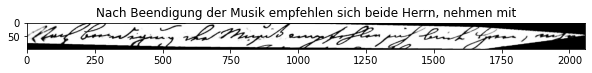

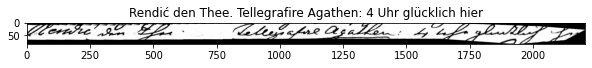

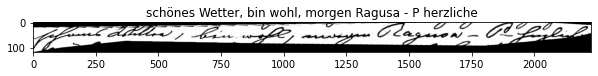

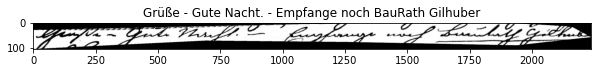

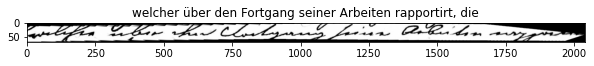

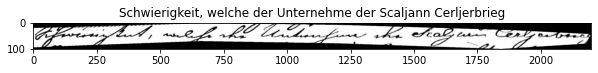

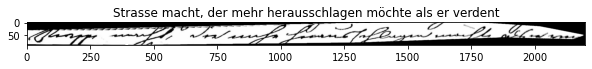

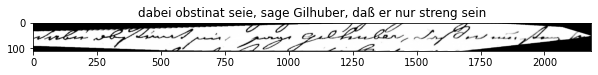

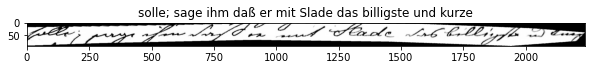

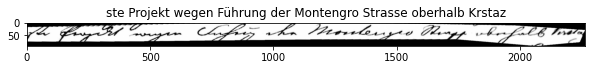

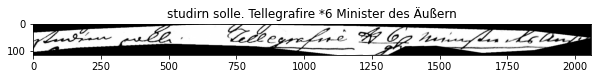

In [4]:
for irow, row in enumerate(data_pairs):
    if irow>10:
        break
    image = Image.open(row['image'])
    bounds = {
        'type': 'baselines',
        'lines': [{'baseline': row['baseline'], 'boundary': row['boundary']}]
    }

    polygon = next(segmentation.extract_polygons(image, bounds))

    fig, ax = plt.subplots(figsize=(10,2))
    ax.imshow(polygon[0])
    ax.set_title(row['text'])
plt.show()

In [ ]:
training_files = ground_truth[:18] # training data is shuffled internally
evaluation_files = ground_truth[18:]

def _update_progress():
    print('.', end='')
def _print_eval(epoch, accuracy, **kwargs):
    print(accuracy)
seg_trainer = KrakenTrainer.segmentation_train_gen(
    training_data=training_files,
    evaluation_data=evaluation_files,
    format_type='xml',
    augment=True
)
seg_trainer.run(_print_eval, _update_progress)

rec_trainer = KrakenTrainer.recognition_train_gen(
    training_data=training_files,
    evaluation_data=evaluation_files,
    format_type='xml',
    augment=True
)
rec_trainer.run(_print_eval, _update_progress)